In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

import plotly as py
import plotly.graph_objs as go

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("imakash3011/customer-personality-analysis")

print("Path to dataset files:", path)
print(os.listdir(path))

Using Colab cache for faster access to the 'customer-personality-analysis' dataset.
Path to dataset files: /kaggle/input/customer-personality-analysis
['marketing_campaign.csv']


In [3]:
df = pd.read_csv(path + '/marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [5]:
df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [6]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

ID: [5524 2174 4141 ... 7270 8235 9405]
Year_Birth: [1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1945
 1991 1962 1953 1961 1956 1992 1900 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940]
Education: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Income: [58138. 46344. 71613. ... 56981. 69245. 52869.]
Kidhome: [0 1 2]
Teenhome: [0 1 2]
Dt_Customer: ['04-09-2012' '08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014'
 '09-09-2013' '13-11-2012' '08-05-2013' '06-06-2013' '13-03-2014'
 '15-11-2013' '10-10-2012' '24-11-2012' '24-12-2012' '31-08-2012'
 '28-03-2013' '03-11-2012' '08-08-2012' '06-01-2013' '23-12-2012'
 '11-01-2014' '18-03-2013' '02-01-2013' '27-05-2013' '20-02-2013'
 '31-05-2013' '22-11-2013' '22-05-2014' '11-05-2013' '29-10-20

## feature engineering

drop unecessary kolom

In [7]:
df = df.drop(columns=[
    'ID',
    'Dt_Customer',
    'AcceptedCmp3',
    'AcceptedCmp4',
    'AcceptedCmp5',
    'AcceptedCmp1',
    'AcceptedCmp2',
    'Response'
])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

transform some kolom

In [8]:
marital_map = {
    'Single': 'Alone',
    'Together': 'Partner',
    'Married': 'Partner',
    'Divorced': 'Alone',
    'Widow': 'Alone',
    'Alone': 'Alone',
    'Absurd': 'Alone',
    'YOLO': 'Alone'
}

df['marital_status'] = df['Marital_Status'].map(marital_map)
df = df.drop(columns=['Marital_Status'])
df.marital_status.value_counts()

,count
marital_status,
Partner,1444
Alone,796


In [9]:
def yeardate_to_age(df):
  df['Age'] = 2014 - df['Year_Birth']

  df_clean = df[df['Age'] < 100].copy()
  return df_clean

df = yeardate_to_age(df)
df.Age.value_counts()

,count
Age,
38,89
43,87
39,83
42,79
44,77
36,77
49,74
41,74
45,71


drop year_birth, z_table

In [10]:
df = df.drop(columns=[
    'Year_Birth',
    'Z_CostContact',
    'Z_Revenue'
])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2237 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2237 non-null   object 
 1   Income               2213 non-null   float64
 2   Kidhome              2237 non-null   int64  
 3   Teenhome             2237 non-null   int64  
 4   Recency              2237 non-null   int64  
 5   MntWines             2237 non-null   int64  
 6   MntFruits            2237 non-null   int64  
 7   MntMeatProducts      2237 non-null   int64  
 8   MntFishProducts      2237 non-null   int64  
 9   MntSweetProducts     2237 non-null   int64  
 10  MntGoldProds         2237 non-null   int64  
 11  NumDealsPurchases    2237 non-null   int64  
 12  NumWebPurchases      2237 non-null   int64  
 13  NumCatalogPurchases  2237 non-null   int64  
 14  NumStorePurchases    2237 non-null   int64  
 15  NumWebVisitsMonth    2237 non-null   int64 

agregasi education

In [11]:
df['HighEducation'] = df['Education'].isin(['Master', 'PhD']).astype(int)

df = df.drop(columns=['Education'])
df.HighEducation.value_counts()

,count
HighEducation,
0,1382
1,855


agregasi status keluarga

In [12]:
df['Family'] = df['Family'] = (
    (df['marital_status'] == 'Partner') &
    ((df['Kidhome'] + df['Teenhome']) > 0)
).astype(int)

df['Children'] = df['Kidhome'] + df['Teenhome']

df = df.drop(columns=[
    'marital_status',
    'Kidhome',
    'Teenhome'
])

df.Family.value_counts()


,count
Family,
0,1177
1,1060


In [13]:
df.Children.value_counts()

,count
Children,
1,1126
0,637
2,421
3,53


total_spendings

In [14]:
spending_cols = [
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds'
]

df['TotalSpending'] = df[spending_cols].sum(axis=1)
df = df.drop(columns=spending_cols)

df.TotalSpending.value_counts()

,count
TotalSpending,
46,19
22,17
57,16
55,15
44,15
...,...
1931,1
1822,1
132,1


drop where income null

In [15]:
df.dropna(subset=['Income'], inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2213 entries, 0 to 2212
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2213 non-null   float64
 1   Recency              2213 non-null   int64  
 2   NumDealsPurchases    2213 non-null   int64  
 3   NumWebPurchases      2213 non-null   int64  
 4   NumCatalogPurchases  2213 non-null   int64  
 5   NumStorePurchases    2213 non-null   int64  
 6   NumWebVisitsMonth    2213 non-null   int64  
 7   Complain             2213 non-null   int64  
 8   Age                  2213 non-null   int64  
 9   HighEducation        2213 non-null   int64  
 10  Family               2213 non-null   int64  
 11  Children             2213 non-null   int64  
 12  TotalSpending        2213 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 224.9 KB


In [16]:
df.isna().sum()

,0
Income,0
Recency,0
NumDealsPurchases,0
NumWebPurchases,0
NumCatalogPurchases,0
NumStorePurchases,0
NumWebVisitsMonth,0
Complain,0
Age,0
HighEducation,0


cek isi data

In [17]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

Income: [58138. 46344. 71613. ... 56981. 69245. 52869.]
Recency: [58 38 26 94 16 34 32 19 68 59 82 53 23 51 20 91 86 41 42 63  0 69 89  4
 96 56 31  8 55 37 76 99  3 88 72 24 92 39 29  2 54 57 30 12 18 75 90  1
 40  9 87  5 95 48 70 79 84 44 43 35 15 17 46 27 25 74 85 65 13 83 10 21
 61 73 47 36 49 28 64 98 78 77 81 80 45 14 52 93 50 60 11 66 97 62  6 33
 22 71 67  7]
NumDealsPurchases: [ 3  2  1  5  4 15  7  6  9  0  8 10 13 11 12]
NumWebPurchases: [ 8  1  2  5  6  7  4  3 11  0 10  9 23 27 25]
NumCatalogPurchases: [10  1  2  0  3  4  6 28  9  5  8  7 11 22]
NumStorePurchases: [ 4  2 10  6  7  0  3  8  5 12  9 13 11  1]
NumWebVisitsMonth: [ 7  5  4  6  8  9 20  2  3  1 10  0 14 19 17 13]
Complain: [0 1]
Age: [57 60 49 30 33 47 43 29 40 64 38 55 62 27 68 34 65 32 35 63 45 25 51 44
 41 71 39 18 46 50 37 36 59 48 26 66 56 42 54 31 69 23 52 61 58 22 53 28
 24 67 21 20 73 70 19 74]
HighEducation: [0 1]
Family: [0 1]
Children: [0 2 1 3]
TotalSpending: [1617   27  776 ...  468 1341  843]


## EDA

income vs spending

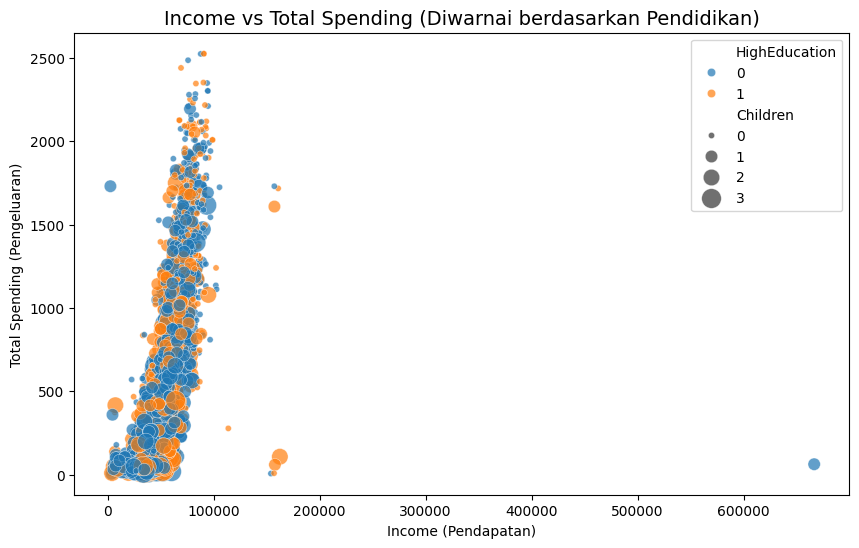

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income', y='TotalSpending', hue='HighEducation', size='Children', sizes=(20, 200), alpha=0.7)
plt.title('Income vs Total Spending (Diwarnai berdasarkan Pendidikan)', fontsize=14)
plt.xlabel('Income (Pendapatan)')
plt.ylabel('Total Spending (Pengeluaran)')
plt.show()

kids effect

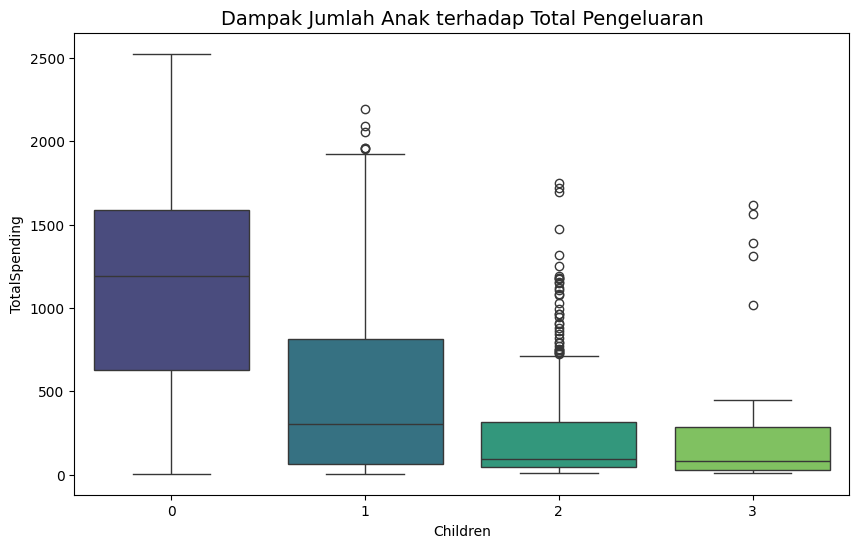

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Children', y='TotalSpending', palette='viridis')
plt.title('Dampak Jumlah Anak terhadap Total Pengeluaran', fontsize=14)
plt.show()

web vs store vs catalog

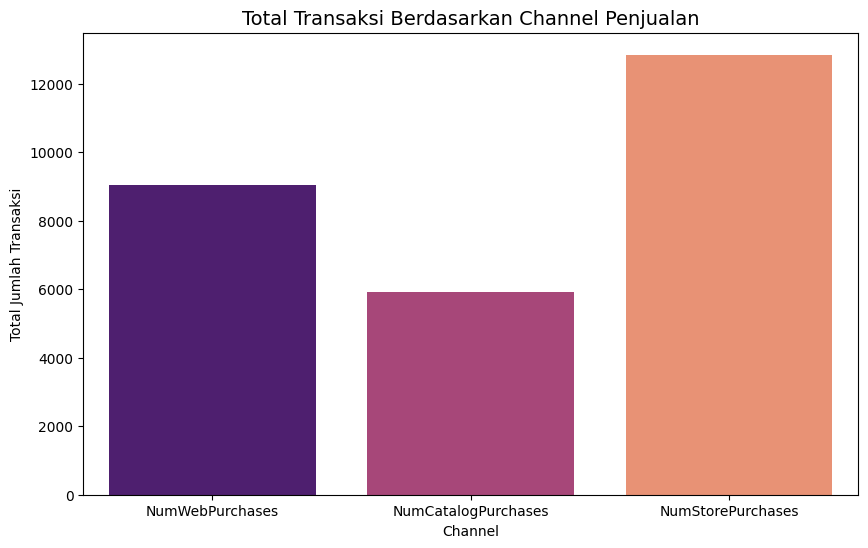

In [20]:
channel_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df_channels = df[channel_cols].melt(var_name='Channel', value_name='Frequency')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_channels, x='Channel', y='Frequency', estimator=sum, errorbar=None, palette='magma')
plt.title('Total Transaksi Berdasarkan Channel Penjualan', fontsize=14)
plt.ylabel('Total Jumlah Transaksi')
plt.show()

age vs web visits

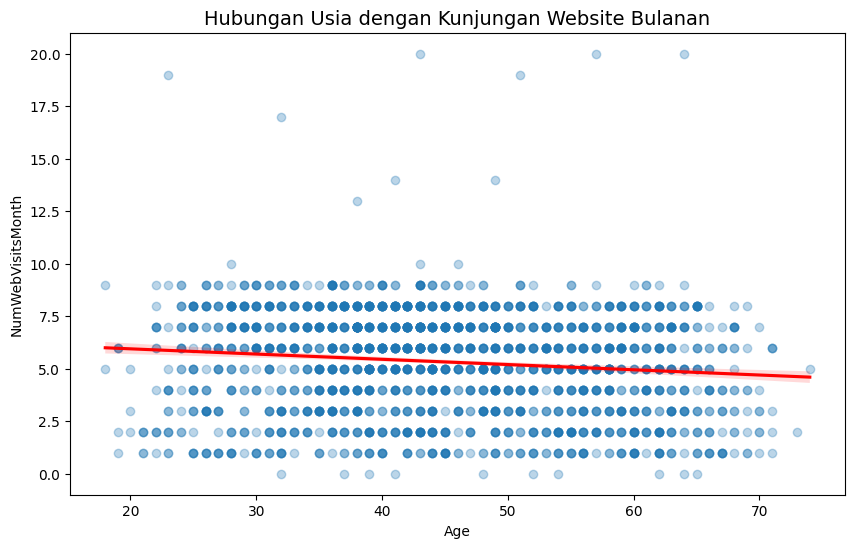

In [21]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Age', y='NumWebVisitsMonth', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Hubungan Usia dengan Kunjungan Website Bulanan', fontsize=14)
plt.show()

num_cols

In [22]:
num_cols = [
    'Income',
    'TotalSpending',
    'Age',
    'Recency',
    'NumWebPurchases',
    'NumStorePurchases',
    'NumDealsPurchases',
    'NumWebVisitsMonth'
    ]


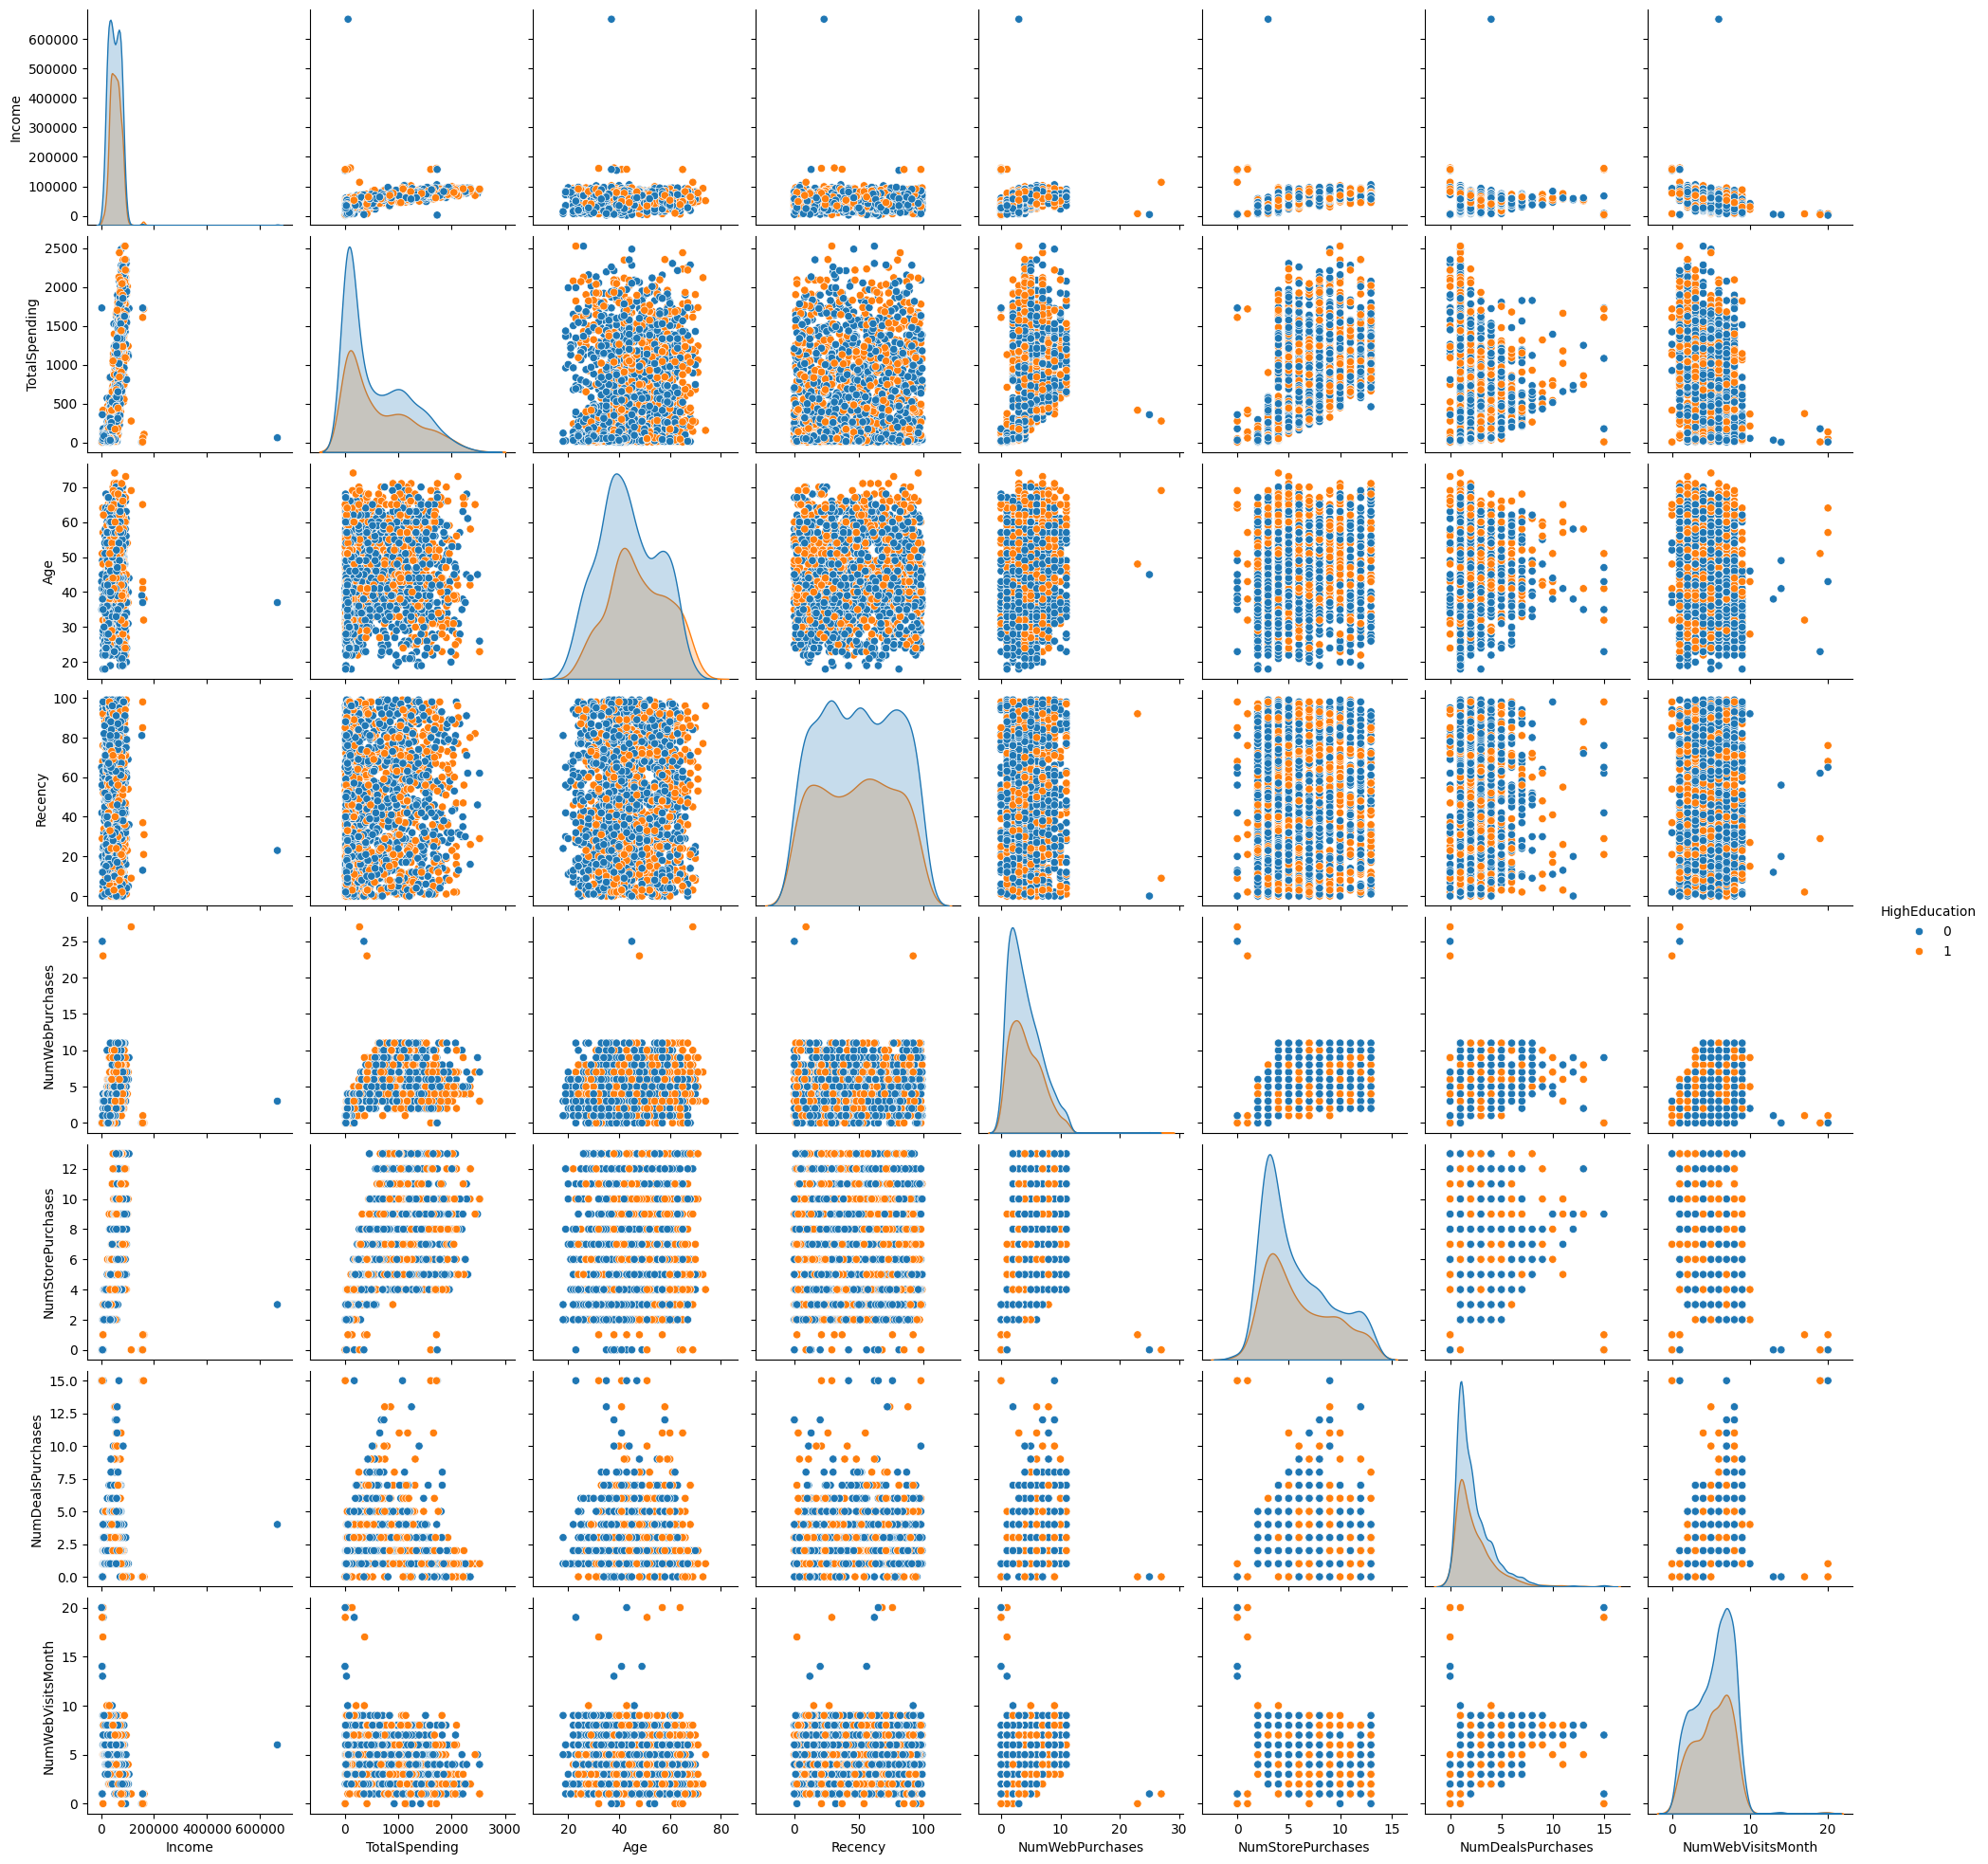

In [23]:
sns.pairplot(df, vars=num_cols, hue='HighEducation')
plt.show()

displot

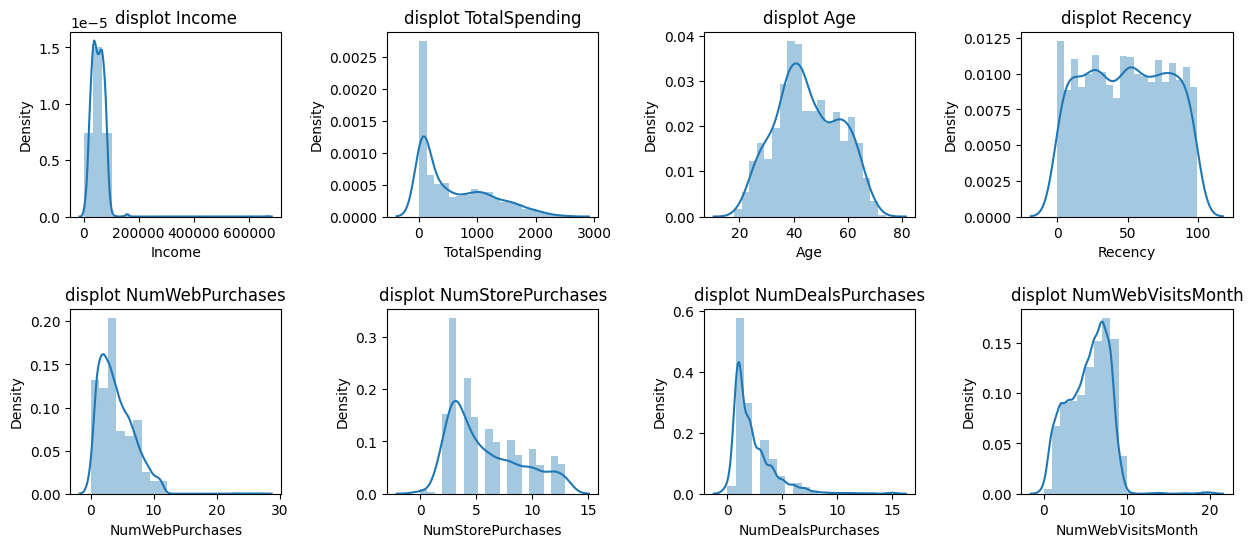

In [24]:
plt.figure(1, figsize=(15, 6))
n = 0

for x in num_cols:
  n += 1
  plt.subplot(2, 4, n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.distplot(df[x], bins=20)
  plt.title('displot {}'.format(x))
plt.show()

heatmap correlation

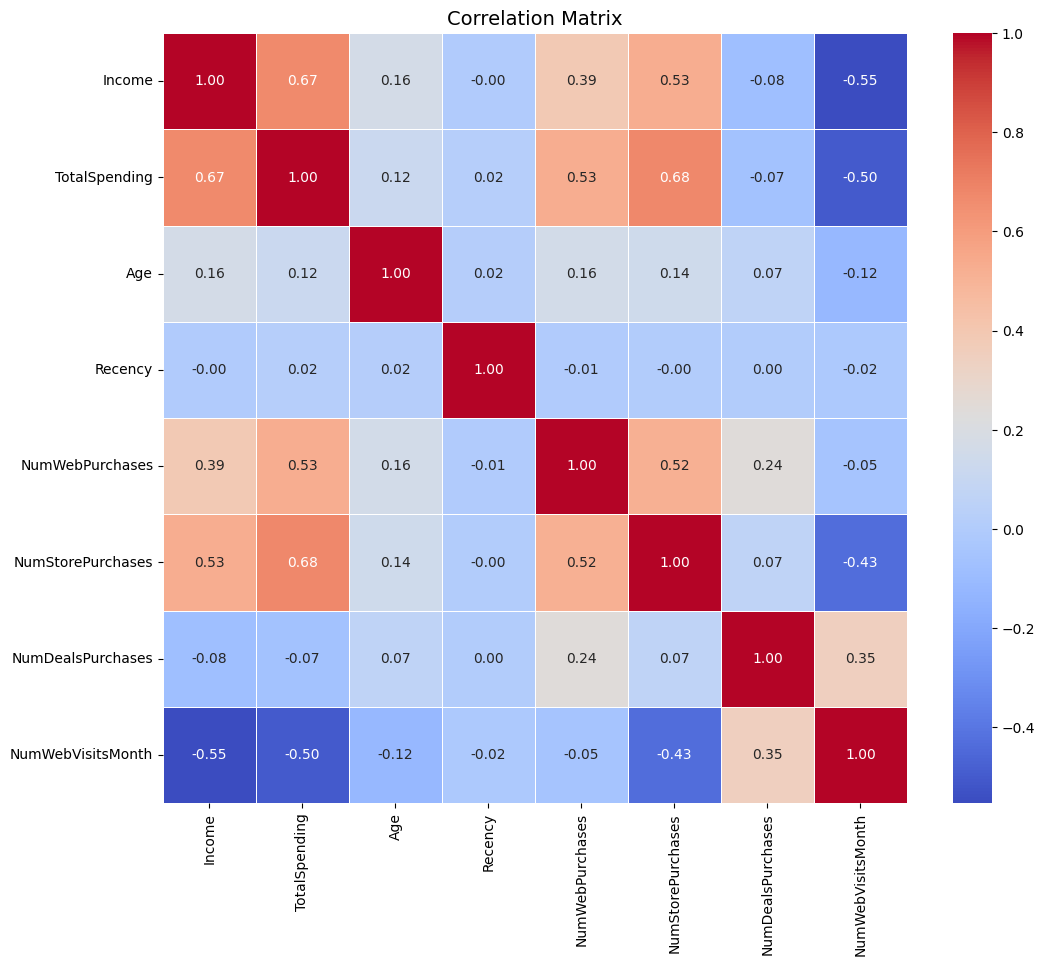

In [25]:
plt.figure(figsize=(12, 10))

corr_matrix = df[num_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

## preprocessing

final fitur

In [26]:
features = [
    'Income',
    'TotalSpending',
    'Recency',
    'Age',
    'Children',
    'NumDealsPurchases',
    'NumWebVisitsMonth',
    'NumWebPurchases',
    'NumCatalogPurchases',
    'NumStorePurchases'
]

X = df[features].copy()

scaler

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df_scale = pd.DataFrame(X_scaled, columns=features)
df_scale.head()

,Income,TotalSpending,Recency,Age,Children,NumDealsPurchases,NumWebVisitsMonth,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,0.234435,1.676723,0.310773,1.018785,-1.264914,0.350656,0.692198,1.427316,2.504247,-0.555456
1,-0.234084,-0.962927,-0.380424,1.275248,1.404857,-0.169104,-0.132699,-1.126455,-0.571168,-1.170837
2,0.769733,0.280531,-0.795142,0.334882,-1.264914,-0.688863,-0.545148,1.427316,-0.229456,1.290688
3,-1.016592,-0.919763,-0.795142,-1.289387,0.069971,-0.169104,0.279749,-0.761631,-0.912881,-0.555456
4,0.240593,-0.307165,1.554927,-1.032923,0.069971,1.390175,-0.132699,0.332842,0.112257,0.059925


## Clustering

search k value

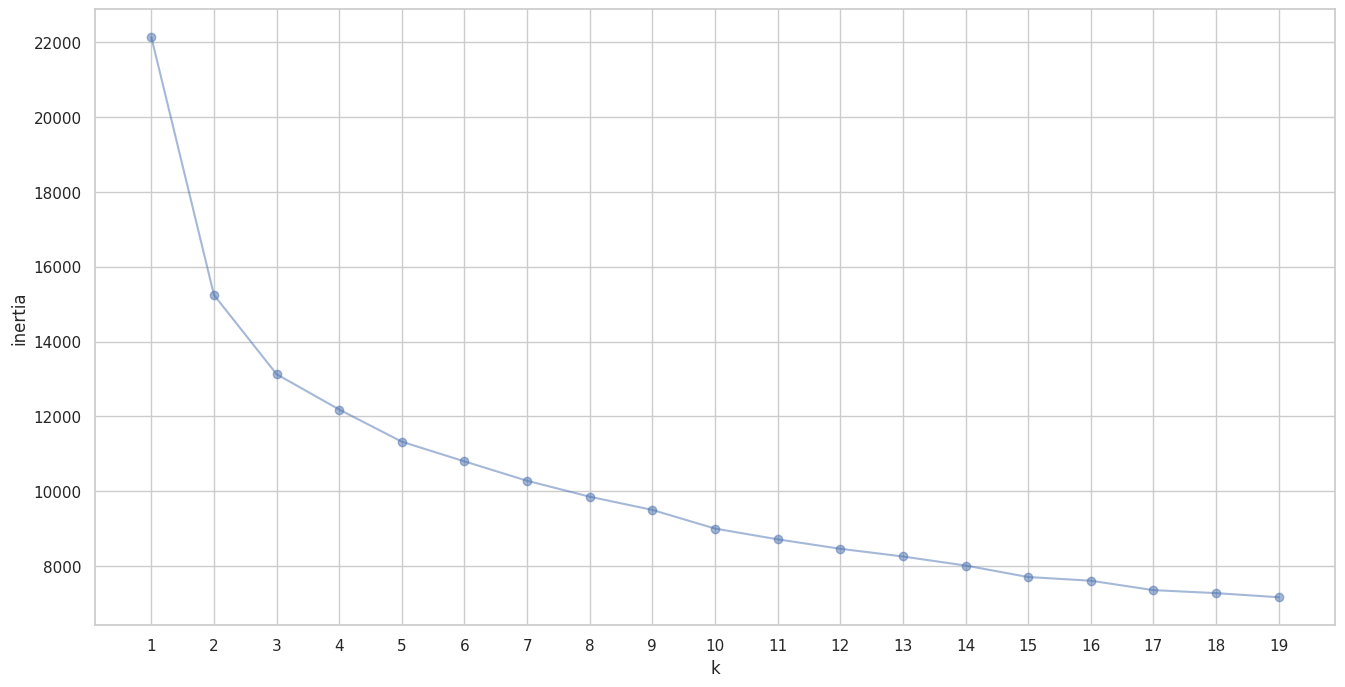

In [28]:
inertia = []
K_range = range(1, 20)

for k in K_range:
    km = (KMeans(n_clusters = k ,
                 init='k-means++',
                 n_init = 10 ,
                 max_iter=300,
                 tol=0.0001,
                 random_state= 42,
                 algorithm='elkan')
    )
    km.fit(df_scale)
    inertia.append(km.inertia_)

sns.set(style='whitegrid')
plt.figure(figsize=(16,8))
plt.plot(K_range, inertia, 'o-', alpha=0.5)
plt.xticks(K_range)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

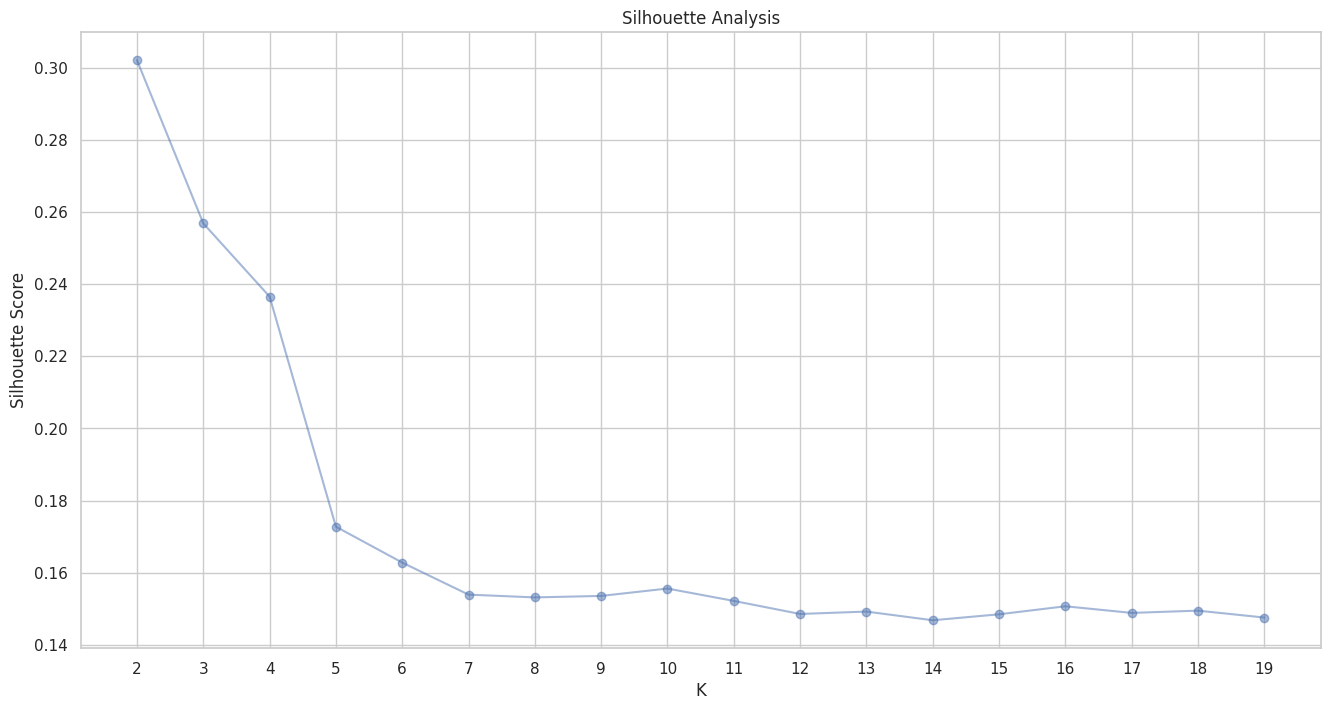

In [29]:
sil_scores = []
K_range = range(2, 20)

for k in K_range:
    km = (KMeans(
      n_clusters = k ,
      init='k-means++',
      n_init = 10 ,
      max_iter=300,
      tol=0.0001,
      random_state= 42,
      algorithm='elkan'
      )
    )
    labels = km.fit_predict(df_scale)
    sil_scores.append(silhouette_score(df_scale, labels))

sns.set(style='whitegrid')
plt.figure(figsize=(16,8))
plt.plot(K_range, sil_scores, 'o-', alpha=0.5)
plt.xlabel('K')
plt.xticks(K_range)
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

tes gemini

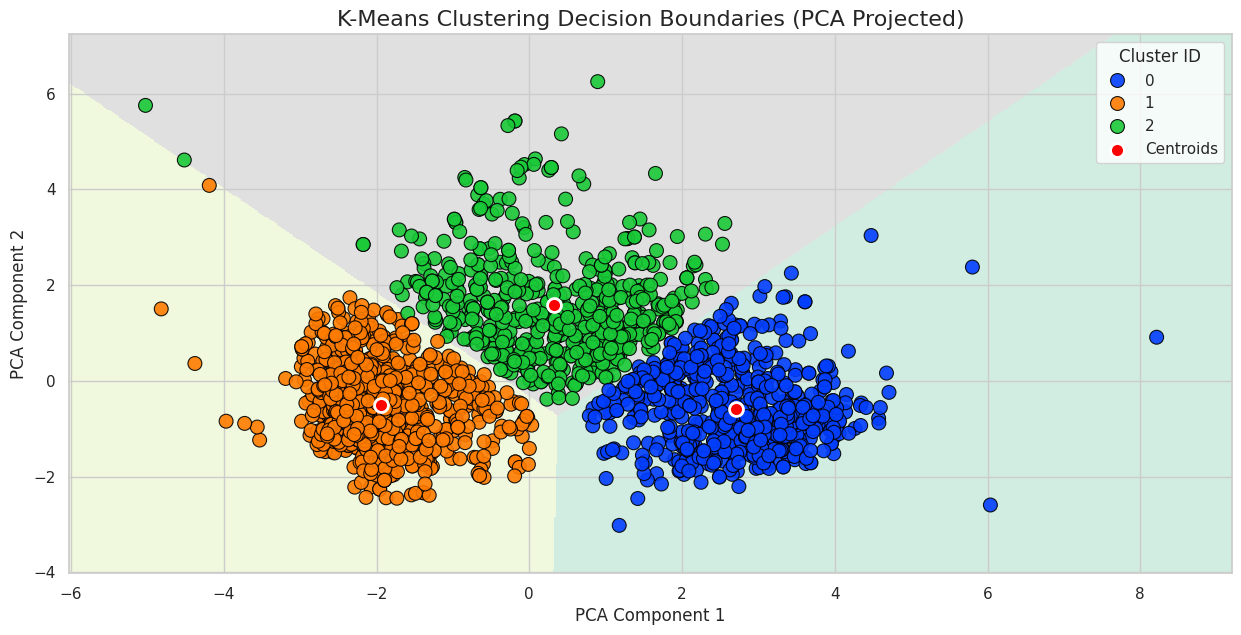

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scale)

X_pca = pca_components

kmeans = KMeans(n_clusters=3,
                init='k-means++',
                n_init=10,
                random_state=42,
                algorithm='elkan')

cluster_labels = kmeans.fit_predict(X_pca)
centroids = kmeans.cluster_centers_

df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = cluster_labels


h = 0.02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(15, 7))
plt.clf()

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap='Pastel2',
           aspect='auto',
           origin='lower',
           alpha=0.6)

sns.scatterplot(
    data=df_pca,
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    palette='bright',
    s=100,
    edgecolor='black',
    alpha=0.9
)

plt.scatter(x=centroids[:, 0], y=centroids[:, 1],
            s=100,
            c='red',
            marker='o',
            label='Centroids',
            alpha=1.0,
            edgecolor='white',
            linewidth=2)


plt.title('K-Means Clustering Decision Boundaries (PCA Projected)', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.legend(title='Cluster ID', loc='upper right')

plt.show()